<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Zalocusky_Data_Scanpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import h5py    
import numpy as np    
import scipy 
from matplotlib import pyplot as plt
!pip install scanpy
import scanpy as sc
import tarfile
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
'''Download all single samples'''
link = 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_RAW.tar'
file_name = 'GSE167497_RAW.tar'
!wget -O $file_name $link
my_tar = tarfile.open('/content/GSE167497_RAW.tar')
my_tar.extractall('./my_folder') # specify which folder to extract to
my_tar.close()
for f in os.listdir('./my_folder'):
    print(f)

--2023-06-09 23:10:18--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_RAW.tar
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 848363520 (809M) [application/x-tar]
Saving to: ‘GSE167497_RAW.tar’

GSE167497_RAW.tar   100%[===================>] 809.06M  49.4MB/s    in 19s     

2023-06-09 23:10:37 (43.3 MB/s) - ‘GSE167497_RAW.tar’ saved [848363520/848363520]

GSM5106148_07_E4_5_A02_raw_gene_bc_matrices_h5.h5
GSM5106174_33_E4_15_C08_raw_gene_bc_matrices_h5.h5
GSM5106149_08_E3_10_A03_raw_gene_bc_matrices_h5.h5
GSM5106143_02_E4_14_H0_raw_gene_bc_matrices_h5.h5
GSM5106158_17_E4_15_A12_raw_gene_bc_matrices_h5.h5
GSM5106155_14_E3_20_A09_raw_gene_bc_matrices_h5.h5
GSM5106157_16_E3_15_A11_raw_gene_bc_matrices_h5.h5
GSM5106169_28_E3_5_C03_raw_gene_bc_matrices_h

In [5]:
def get_file(link):
    file_name = os.path.basename(link)
    !wget -O $file_name $link
    return file_name

barcode_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_barcode_summary_h5.h5')
filtered_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_filtered_gene_bc_matrices_h5.h5')
raw_gene_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_raw_gene_bc_matrices_h5.h5')


--2023-06-09 23:09:21--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_barcode_summary_h5.h5
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 165.112.9.228, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637366753 (608M)
Saving to: ‘GSE167497_barcode_summary_h5.h5’

GSE167497_barcode_s 100%[===================>] 607.84M  49.8MB/s    in 11s     

2023-06-09 23:09:33 (53.1 MB/s) - ‘GSE167497_barcode_summary_h5.h5’ saved [637366753/637366753]

--2023-06-09 23:09:33--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_filtered_gene_bc_matrices_h5.h5
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 165.112.9.228, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response

AnnData object with n_obs × n_vars = 4969 × 27998
    var: 'gene_ids'

In [97]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.10


In [5]:
adata = sc.read_10x_h5(raw_gene_file_name)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, max_genes=2400)
sc.pp.filter_genes(adata, min_cells=500)
sc.pp.filter_genes(adata, max_cells=4500)
adata

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 6271 × 3856
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [11]:
display(adata.var)

,gene_ids,n_cells
Xkr4,ENSMUSG00000051951,3834
Gm1992,ENSMUSG00000089699,1028
Atp6v1h,ENSMUSG00000033793,1028
Rb1cc1,ENSMUSG00000025907,1582
St18,ENSMUSG00000033740,1686
...,...,...
mt-Co3,ENSMUSG00000064358,2399
mt-Nd4,ENSMUSG00000064363,1046
mt-Cytb,ENSMUSG00000064370,1480
Tmlhe,ENSMUSG00000079834,704


In [12]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

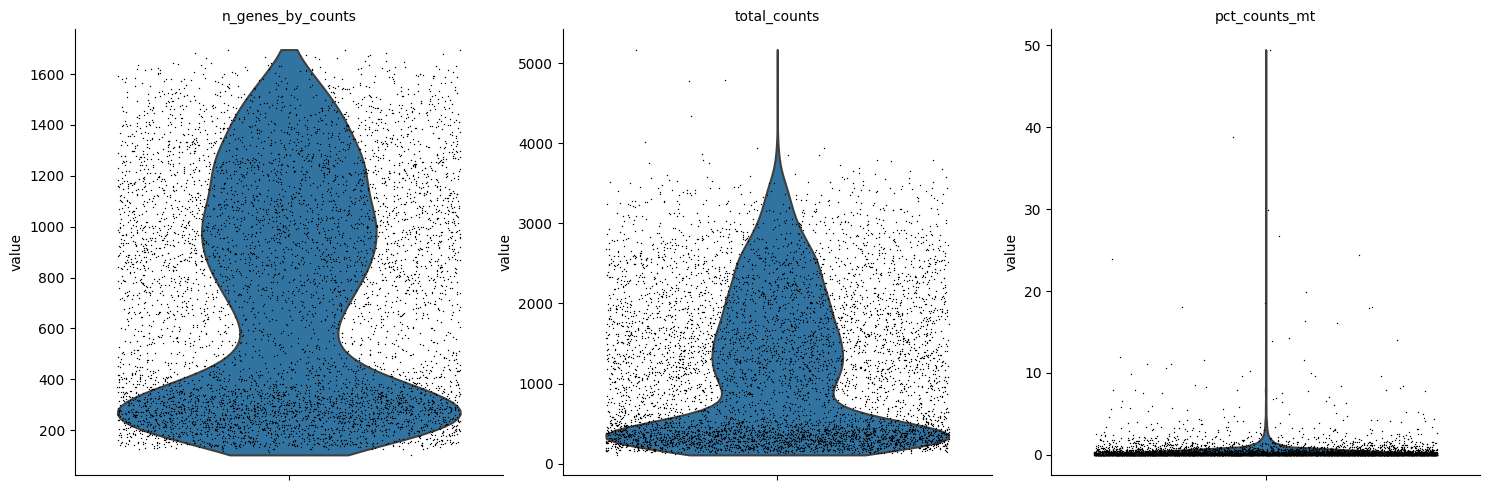

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

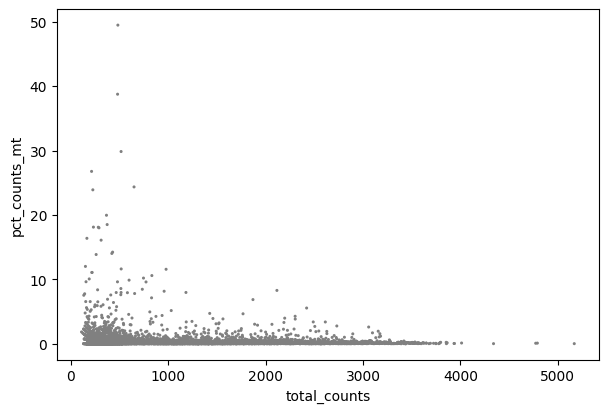

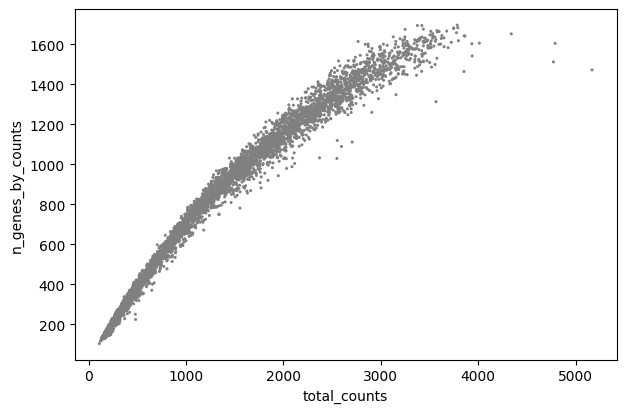

In [14]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [15]:
# adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 0.25, :]
adata

View of AnnData object with n_obs × n_vars = 4022 × 3856
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
var = {}
obs = {}
X = {}
for f in os.listdir('./my_folder'):
    adata = sc.read_10x_h5('./my_folder/'+f)
    var[f] = adata.var
    obs[f] = adata.obs.index
    X[f] = adata.X
# display(obs)

In [43]:
adata

AnnData object with n_obs × n_vars = 737280 × 27998
    var: 'gene_ids'

AAACCTGAGAAACCAT-1
  (0, 320)	1.0
  (0, 10460)	1.0
  (0, 12620)	1.0
  (0, 18638)	1.0
  (0, 23113)	1.0
  (0, 27228)	1.0
AAACCTGAGAAACCAT-1
  (0, 2275)	1.0
  (0, 7582)	1.0
  (0, 18903)	1.0
  (0, 20504)	1.0
  (0, 27228)	4.0
AAACCTGAGAAACCAT-1
  (0, 12251)	1.0
  (0, 19602)	1.0
  (0, 26553)	1.0
AAACCTGAGAAACCAT-1
  (0, 8333)	1.0
  (0, 18309)	1.0
  (0, 22502)	1.0
  (0, 23761)	1.0
  (0, 27228)	1.0
AAACCTGAGAAACCAT-1
  (0, 1116)	1.0
  (0, 5628)	1.0
  (0, 7163)	1.0
  (0, 23475)	1.0
  (0, 27228)	2.0
AAACCTGAGAAACCAT-1
  (0, 1773)	1.0
  (0, 2411)	1.0
  (0, 8908)	1.0
  (0, 13957)	1.0
  (0, 22035)	1.0
  (0, 22595)	1.0
  (0, 23176)	1.0
  (0, 27228)	1.0
AAACCTGAGAAACCAT-1
  (0, 219)	1.0
  (0, 10751)	1.0
  (0, 11623)	1.0
  (0, 16765)	1.0
AAACCTGAGAAACCAT-1
  (0, 13697)	1.0
  (0, 25632)	1.0
  (0, 25771)	1.0
  (0, 27228)	1.0
AAACCTGAGAAACCAT-1
  (0, 4578)	1.0
  (0, 19366)	1.0
  (0, 25777)	1.0
  (0, 27228)	2.0
AAACCTGAGAAACCAT-1

AAACCTGAGAAACCAT-1
  (0, 0)	1.0
  (0, 14516)	1.0
  (0, 16891)	1.0
  (0, 238

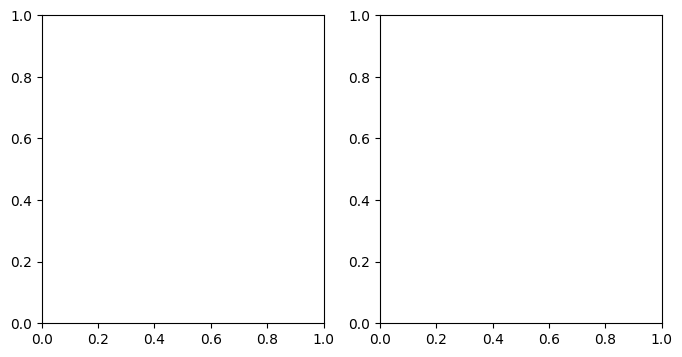

In [61]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
key_list = list(X.keys())
for k in key_list:
    v = X[k]
    print(obs[k][0])
    print(v[0,:])

In [12]:
for k,v in obs.items():
    print(k)
    print(v[0:10])
    print(len(v))

GSM5106148_07_E4_5_A02_raw_gene_bc_matrices_h5.h5
Index(['AAACCTGAGAAACCAT-1', 'AAACCTGAGAAACCGC-1', 'AAACCTGAGAAACCTA-1',
       'AAACCTGAGAAACGAG-1', 'AAACCTGAGAAACGCC-1', 'AAACCTGAGAAAGTGG-1',
       'AAACCTGAGAACAACT-1', 'AAACCTGAGAACAATC-1', 'AAACCTGAGAACTCGG-1',
       'AAACCTGAGAACTGTA-1'],
      dtype='object')
737280
GSM5106174_33_E4_15_C08_raw_gene_bc_matrices_h5.h5
Index(['AAACCTGAGAAACCAT-1', 'AAACCTGAGAAACCGC-1', 'AAACCTGAGAAACCTA-1',
       'AAACCTGAGAAACGAG-1', 'AAACCTGAGAAACGCC-1', 'AAACCTGAGAAAGTGG-1',
       'AAACCTGAGAACAACT-1', 'AAACCTGAGAACAATC-1', 'AAACCTGAGAACTCGG-1',
       'AAACCTGAGAACTGTA-1'],
      dtype='object')
737280
GSM5106149_08_E3_10_A03_raw_gene_bc_matrices_h5.h5
Index(['AAACCTGAGAAACCAT-1', 'AAACCTGAGAAACCGC-1', 'AAACCTGAGAAACCTA-1',
       'AAACCTGAGAAACGAG-1', 'AAACCTGAGAAACGCC-1', 'AAACCTGAGAAAGTGG-1',
       'AAACCTGAGAACAACT-1', 'AAACCTGAGAACAATC-1', 'AAACCTGAGAACTCGG-1',
       'AAACCTGAGAACTGTA-1'],
      dtype='object')
737280
GSM5106143_02_